In [1]:
import pandas, numpy, scipy.stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_smile = pandas.read_excel('leniency.xls')
data_smile.head()

,smile,leniency
0,1,2.5
1,1,5.5
2,1,6.5
3,1,3.5
4,1,3.0


In [3]:
data_smile.shape

(136, 2)

In [4]:
data_smile['smile'].unique()

array([1, 2, 3, 4], dtype=int64)

In [5]:
len(data_smile[data_smile['smile']==1])

34

In [6]:
len(data_smile[data_smile['smile']==2])

34

In [7]:
len(data_smile[data_smile['smile']==3])

34

In [8]:
len(data_smile[data_smile['smile']==4])

34

In [9]:
data_smile[data_smile['smile']==4].head()

,smile,leniency
102,4,2.0
103,4,4.0
104,4,4.0
105,4,3.0
106,4,6.0


In [10]:
data_smile[data_smile['smile']==4]['leniency'].head()

102    2.0
103    4.0
104    4.0
105    3.0
106    6.0
Name: leniency, dtype: float64

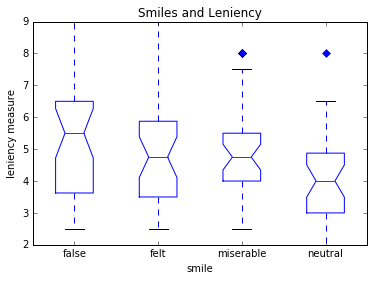

In [11]:
labels = ['false', 'felt', 'miserable', 'neutral']
toto = [data_smile[data_smile['smile']==1]['leniency'], data_smile[data_smile['smile']==2]['leniency'], data_smile[data_smile['smile']==3]['leniency'], data_smile[data_smile['smile']==4]['leniency']]
plt.boxplot(toto, 1, 'gD', labels = labels)
plt.xlabel('smile')
plt.ylabel('leniency measure')
plt.title("Smiles and Leniency")
plt.show()

In [18]:
labels = ['false', 'felt', 'miserable', 'neutral']
number = []
means = []
variances = []
for i in range(1,5):
    number.append(len(data_smile[data_smile['smile']==i]))
    means.append(numpy.mean(data_smile[data_smile['smile']==i]['leniency']))
    variances.append(scipy.stats.tvar(data_smile[data_smile['smile']==i]['leniency']))

data_smile_summary = pandas.DataFrame({'Condition': labels, 'Mean': means, 'Variance': variances, 'Size': number})
data_smile_summary.head()


,Condition,Mean,Size,Variance
0,false,5.367647,34,3.338012
1,felt,4.911765,34,2.825312
2,miserable,4.911765,34,2.113191
3,neutral,4.117647,34,2.319073


In [21]:
mse = data_smile_summary['Variance'].mean()
mse

2.64889705882353

Although we don't the variance of the sampling distribution of the mean, we can estimate with the variance of sample means

In [26]:
scipy.stats.tvar(data_smile_summary['Mean'])

0.269950259515571

In [28]:
msb = scipy.stats.tvar(data_smile_summary['Mean']) * 34
msb

9.1783088235294148

To sum up these steps:

1.Compute the means.

2.Compute the variance of the means.

3.Multiply the variance of the means by n.

In [29]:
F = msb/mse
F

3.4649548924358089

DFnumerator = k-1 (MSB) 

DFdenominator = N-k (MSE)

In [33]:
1-scipy.stats.f.cdf(F, 3, 132, 0, 1)

0.01820073122157928

Example for using scipy.stats.f

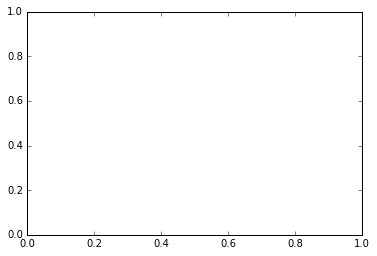

In [58]:
fig, ax = plt.subplots(1,1)

In [42]:
dfn, dfd = 29, 18
mean, var, skew, kurt = scipy.stats.f.stats(dfn, dfd, moments='mvsk')

In [43]:
scipy.stats.f.ppf(0.01,dfn,dfd)

0.38084718434477144

In [46]:
x = numpy.linspace(scipy.stats.f.ppf(0.01,dfn,dfd), scipy.stats.f.ppf(0.99,dfn,dfd), 100)
x

array([ 0.38084718,  0.40659381,  0.43234043,  0.45808705,  0.48383367,
        0.5095803 ,  0.53532692,  0.56107354,  0.58682016,  0.61256679,
        0.63831341,  0.66406003,  0.68980665,  0.71555328,  0.7412999 ,
        0.76704652,  0.79279314,  0.81853977,  0.84428639,  0.87003301,
        0.89577963,  0.92152626,  0.94727288,  0.9730195 ,  0.99876612,
        1.02451275,  1.05025937,  1.07600599,  1.10175261,  1.12749924,
        1.15324586,  1.17899248,  1.2047391 ,  1.23048573,  1.25623235,
        1.28197897,  1.30772559,  1.33347222,  1.35921884,  1.38496546,
        1.41071208,  1.43645871,  1.46220533,  1.48795195,  1.51369857,
        1.5394452 ,  1.56519182,  1.59093844,  1.61668506,  1.64243168,
        1.66817831,  1.69392493,  1.71967155,  1.74541817,  1.7711648 ,
        1.79691142,  1.82265804,  1.84840466,  1.87415129,  1.89989791,
        1.92564453,  1.95139115,  1.97713778,  2.0028844 ,  2.02863102,
        2.05437764,  2.08012427,  2.10587089,  2.13161751,  2.15

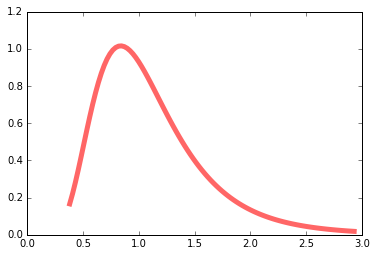

In [71]:
plt.plot(x, scipy.stats.f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label= 'f pdf')

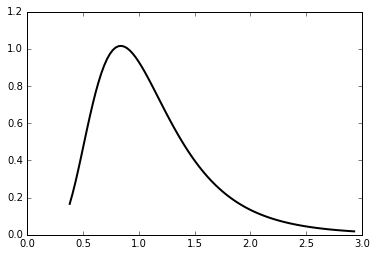

In [72]:
rv = scipy.stats.f(dfn,dfd)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [75]:
rv.pdf(x)

array([ 0.16619395,  0.22136104,  0.28342854,  0.3507999 ,  0.4216384 ,
        0.49401724,  0.5660504 ,  0.63599579,  0.70232807,  0.7637825 ,
        0.81937363,  0.86839396,  0.91039777,  0.9451749 ,  0.97271892,
        0.99319276,  1.00689449,  1.01422501,  1.01565862,  1.01171734,
        1.00294898,  0.98990913,  0.97314667,  0.95319262,  0.93055182,
        0.90569712,  0.87906565,  0.85105672,  0.82203114,  0.79231158,
        0.76218369,  0.73189782,  0.70167117,  0.6716901 ,  0.64211267,
        0.61307117,  0.58467462,  0.55701123,  0.53015068,  0.50414636,
        0.47903734,  0.45485026,  0.43160107,  0.4092965 ,  0.38793551,
        0.3675105 ,  0.34800844,  0.32941181,  0.31169949,  0.29484748,
        0.27882959,  0.26361794,  0.24918352,  0.23549656,  0.22252686,
        0.21024414,  0.19861825,  0.18761937,  0.17721822,  0.16738612,
        0.15809518,  0.14931832,  0.14102935,  0.13320304,  0.12581512,
        0.11884227,  0.11226221,  0.10605362,  0.10019614,  0.09

In [66]:
vals = scipy.stats.f.ppf([0.001, 0.5, 0.999], dfn, dfd)
vals

array([ 0.27535707,  1.01440182,  4.32127784])

In [67]:
numpy.allclose([0.001, 0.5, 0.999],  scipy.stats.f.cdf(vals, dfn, dfd))

True

In [68]:
r = scipy.stats.f.rvs(dfn, dfd, size=1000)
r

array([ 0.71296141,  0.57999761,  1.51421417,  0.79458054,  1.28624141,
        0.77640119,  0.7852057 ,  0.7423303 ,  0.56107957,  1.81117856,
        1.41016088,  1.61475635,  1.75128639,  0.64554369,  1.76236526,
        1.05887859,  1.10437665,  1.70611667,  1.50734485,  0.66429063,
        1.80155126,  1.06296942,  2.47936778,  2.13572775,  1.20052235,
        1.43244475,  0.81743287,  0.50236505,  0.94142469,  0.51218198,
        0.7265255 ,  0.99183354,  0.69397218,  1.41346632,  1.72099495,
        0.82992419,  2.42929895,  0.63430965,  1.62979301,  0.81678559,
        1.89565654,  0.94916649,  0.75857791,  0.97815529,  1.23781014,
        0.89233539,  3.4030636 ,  3.08468472,  1.15709985,  0.3733279 ,
        0.57832841,  1.12384992,  1.02880874,  1.0009729 ,  0.71595102,
        1.87209448,  1.72442062,  0.854927  ,  1.24247186,  0.45581093,
        0.97300172,  0.71901908,  1.06916332,  0.82841301,  0.38856251,
        0.52546855,  1.69199556,  1.58779503,  0.84062303,  0.67

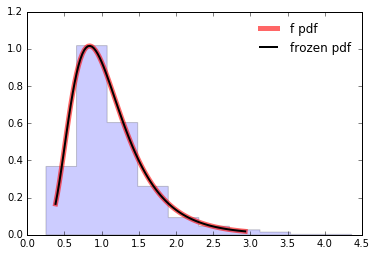

In [76]:
plt.plot(x, scipy.stats.f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.6, label= 'f pdf')
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.show()

In [78]:
GM = data_smile['leniency'].mean()

In [80]:
SSQ_total = numpy.sum(numpy.power((data_smile['leniency']-GM), 2))

In [85]:
SSQ_condition = 34*nbumpy.sum(numpy.power((data_smile_summary['Mean']-GM), 2))

In [86]:
data_smile_summary['Mean'][0]

5.367647058823529

In [96]:
SSQ_error = numpy.sum(numpy.power((data_smile[data_smile['smile']==1]['leniency']-data_smile_summary['Mean'][0]), 2))\
+ numpy.sum(numpy.power((data_smile[data_smile['smile']==2]['leniency']-data_smile_summary['Mean'][1]), 2))\
+ numpy.sum(numpy.power((data_smile[data_smile['smile']==3]['leniency']-data_smile_summary['Mean'][2]), 2))\
+ numpy.sum(numpy.power((data_smile[data_smile['smile']==4]['leniency']-data_smile_summary['Mean'][3]), 2))

In [90]:
SSQ_total

377.18933823529403

In [91]:
SSQ_condition

27.534926470588243

In [93]:
numpy.sum(numpy.power((data_smile[data_smile['smile']==1]['leniency']-data_smile_summary['Mean'][0]), 2))

110.15441176470588

In [97]:
SSQ_error

349.6544117647059

MSB = SSQcondition/dfn

In [98]:
SSQ_condition/3

9.178308823529415

MSE = SSQerror/dfd

In [99]:
SSQ_total/132

2.8574949866310155

In [100]:
test = pandas.DataFrame({'G1':[38,47,62,47,73,46,50,66], 'G2':[54,46,65,27,38,58,34,34], 'G3': [27,53,50,43,48,45,42,42]})

In [102]:
mse = (scipy.stats.tvar(test['G1']) + scipy.stats.tvar(test['G2']) +scipy.stats.tvar(test['G3']))/3
msb = 8*(scipy.stats.tvar([scipy.stats.tmean(test['G1']), scipy.stats.tmean(test['G2']), scipy.stats.tmean(test['G3'])]))

In [103]:
F = msb/mse
p = 1-scipy.stats.f.cdf(F, 2, 3*8-3)
p

0.17702114679707415

In [116]:
test = pandas.DataFrame({'G1':[51,71,71,74,59,55,69,46], 'G2':[62,22,55,35,46,44,45,32], 'G3': [57,45,45,63,50,34,47,49]})

def anova (df):
    n = len(df)
    k = df.shape[1]
    N = n*8
    dfn = k-1
    dfd = N-k
    mse = 0
    msb = 0
    means = []
    for col in df.columns:
        mse = mse + scipy.stats.tvar(df[col])
        means.append(scipy.stats.tmean(df[col]))
    mse = mse/k
    msb = n*scipy.stats.tvar(means)
    F = msb/mse
    p = 1-scipy.stats.f.cdf(F, dfn, dfd)
    return(mse, msb, F, p)

In [113]:
test.columns

Index(['G1', 'G2', 'G3'], dtype='object')

In [117]:
mse, msb, F, p = anova(test)

In [118]:
F

6.7106348317466784

In [119]:
scipy.stats.tvar([4.5,7.2,3.4,9.1,1.2])

9.7169999999999987

In [120]:
scipy.stats.tmean([1.33,0.98,1.03,0.78,0.56])

0.93599999999999994

In [125]:
scipy.stats.t.cdf(-2.5, 12)**2

0.00019481738330668597